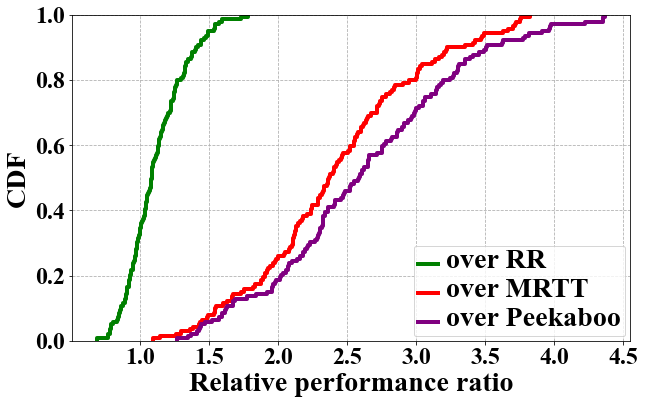

In [5]:
## completion time with four paths

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"

import matplotlib
matplotlib.rc('pdf', fonttype=42)

schedulerTypes = [0,1,4,5]
topDir = '../results-globecom/'
comTime = []

for j in range(1,201):
    c_time = []
    for i in schedulerTypes:
        dir = topDir+'four-c-'+str(j)
        file = open(dir+'/scheduler'+str(i)+'-queue.txt', 'r')
        last_line = file.readlines()[-1]
        if (int(last_line.split('\t')[3]) > 5000000):
            c_time.append(float(last_line.split('\t')[0]))
        else:
            c_time.append(0)
    comTime.append(c_time)

dataTotal = pd.DataFrame (comTime, columns = ['RR', 'MRTT', 'PEEK', 'MSAB'])

## clean data
toDrop = dataTotal.loc[dataTotal["RR"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["MRTT"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["MSAB"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)
toDrop =dataTotal.loc[dataTotal["PEEK"] == 0.0].index.tolist()
dataTotal = dataTotal.drop(toDrop)

import seaborn as sns

plt.figure(figsize=(10,6))
sns.ecdfplot(data = dataTotal['RR']/dataTotal['MSAB'], label = "over RR", color='green', linewidth=4, linestyle="-")
sns.ecdfplot(data = dataTotal['MRTT']/dataTotal['MSAB'], label = "over MRTT", color='red', linewidth=4, linestyle="-")
sns.ecdfplot(data = dataTotal['PEEK']/dataTotal['MSAB'], label = "over Peekaboo", color='purple', linewidth=4, linestyle="-")

plt.legend()
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=28, fontweight='bold')  
plt.grid(linestyle="--") 
plt.xticks(fontsize=24, fontweight='bold')  
plt.yticks(fontsize=24, fontweight='bold')
plt.xlabel("Relative performance ratio", fontsize=28, fontweight='bold')
plt.ylabel("CDF", fontsize=28, fontweight='bold')
plt.savefig('./four_cdf.pdf', format='pdf')
plt.show()
  

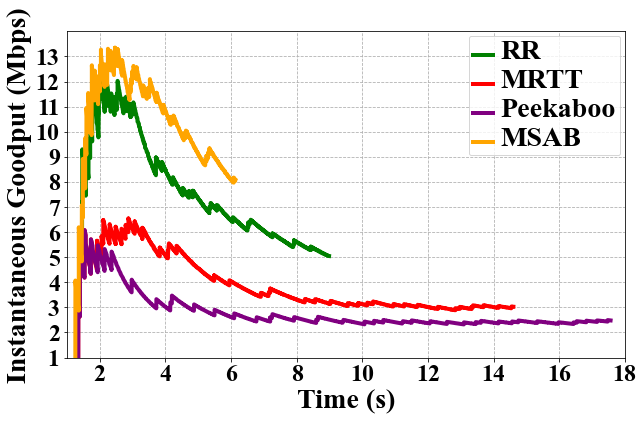

In [13]:
## instantaneous goodput with four paths

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"

import matplotlib
matplotlib.rc('pdf', fonttype=42)

comTime = []

topDir = '../results-globecom/'
def help(i):
    file = open(topDir+'four-c-38'+'/scheduler'+str(i)+'-queue.txt', 'r')
    finish_time = float(file.readlines()[-1].split('\t')[0])
    file = open(topDir+'four-c-38'+'/scheduler'+str(i)+'-rx.txt', 'r')
    lines = file.readlines()
    goodput = []
    c_time = []
    for line in lines:
        temp = line.split('\t')
        if (temp[0] == '1' and c_time == []):
            c_time.append(float(temp[1]))
            c_time.append(float(temp[5]))
        if (temp[0] == '3' and len(c_time) == 2):
            c_time[1] = c_time[1] + float(temp[5])
        if (temp[0] == '4' and len(c_time) == 2):
            c_time[1] = c_time[1] + float(temp[5])
        if (temp[0] == '5' and len(c_time) == 2):
            c_time[1] = c_time[1] + float(temp[5])
            c_time.append(i)
            goodput.append(c_time)
            if (c_time[0] > finish_time):
                break
            c_time = []
    dataTotal = pd.DataFrame (goodput, columns = ['Time', 'goodput', 'scheduler'])        
    return dataTotal


rr = help(0)  
minrtt = help(1)
peek = help(4)
mab = help(5)

plt.figure(figsize=(10, 6))
plt.grid(linestyle="--")
ax = plt.gca()

plt.plot(rr['Time'], rr['goodput'], color="green", label="RR", linewidth=4)
plt.plot(minrtt['Time'], minrtt['goodput'], color="red", label="MRTT", linewidth=4)
plt.plot(peek['Time'], peek['goodput'], color="purple", label="Peekaboo", linewidth=4)
plt.plot(mab['Time'], mab['goodput'], color="orange", label="MSAB", linewidth=4)

plt.xticks(np.arange(0,20,2),fontsize=24, fontweight='bold')
plt.yticks(np.arange(1,14,1),fontsize=24, fontweight='bold')
plt.ylabel("Instantaneous Goodput (Mbps)", fontsize=28, fontweight='bold')
plt.xlabel("Time (s)", fontsize=28, fontweight='bold')

plt.xlim(1,18)
plt.ylim(1,14)

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=28, fontweight='bold') 

plt.savefig('./four_goodput.pdf', format='pdf') 
plt.show()


In [7]:
plt.close()